In [81]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
#TODO  make it organized
results_dir='/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_1D/nsdsyn'
dataset = 'nsdsyn'
full_ver= [True]
if dataset == 'nsdsyn':
    sn_list = np.arange(1,3)
    stat = 'mean'
elif dataset == 'broderick':
    sn_list=[1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
    stat = 'median'
lr = 0.005
max_epoch = 10000
roi = 'V1'
fig_dir='/Volumes/server/Projects/sfp_nsd/derivatives/figures/sfp_model/results_1D/nsdsyn'

In [73]:
subj = 'subj01'
e1, e2 = 0.5, 4
enum = '8'
vs='pRFcenter'
stim_type_list = ['forward-spiral', 'reverse-spiral', 'annulus', 'pinwheel']
subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,2)]

In [55]:
f = []
for stim_type, subj in itertools.product(stim_type_list, subj_list):
    file_name = f'loss-history_class-{stim_type}_lr-{lr}_eph-{max_epoch}_binned-ecc-{e1}-{e2}_nbin-{enum}_dset-nsdsyn_sub-{subj}_roi-{roi}_vs-pRFcenter.h5'
    f.append(os.path.join(results_dir, file_name))
args = ['class','lr','eph','dset','sub','roi']
df = tuning.load_history_files(f, *args)

In [58]:
np.linspace(0.5, 4, 8)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

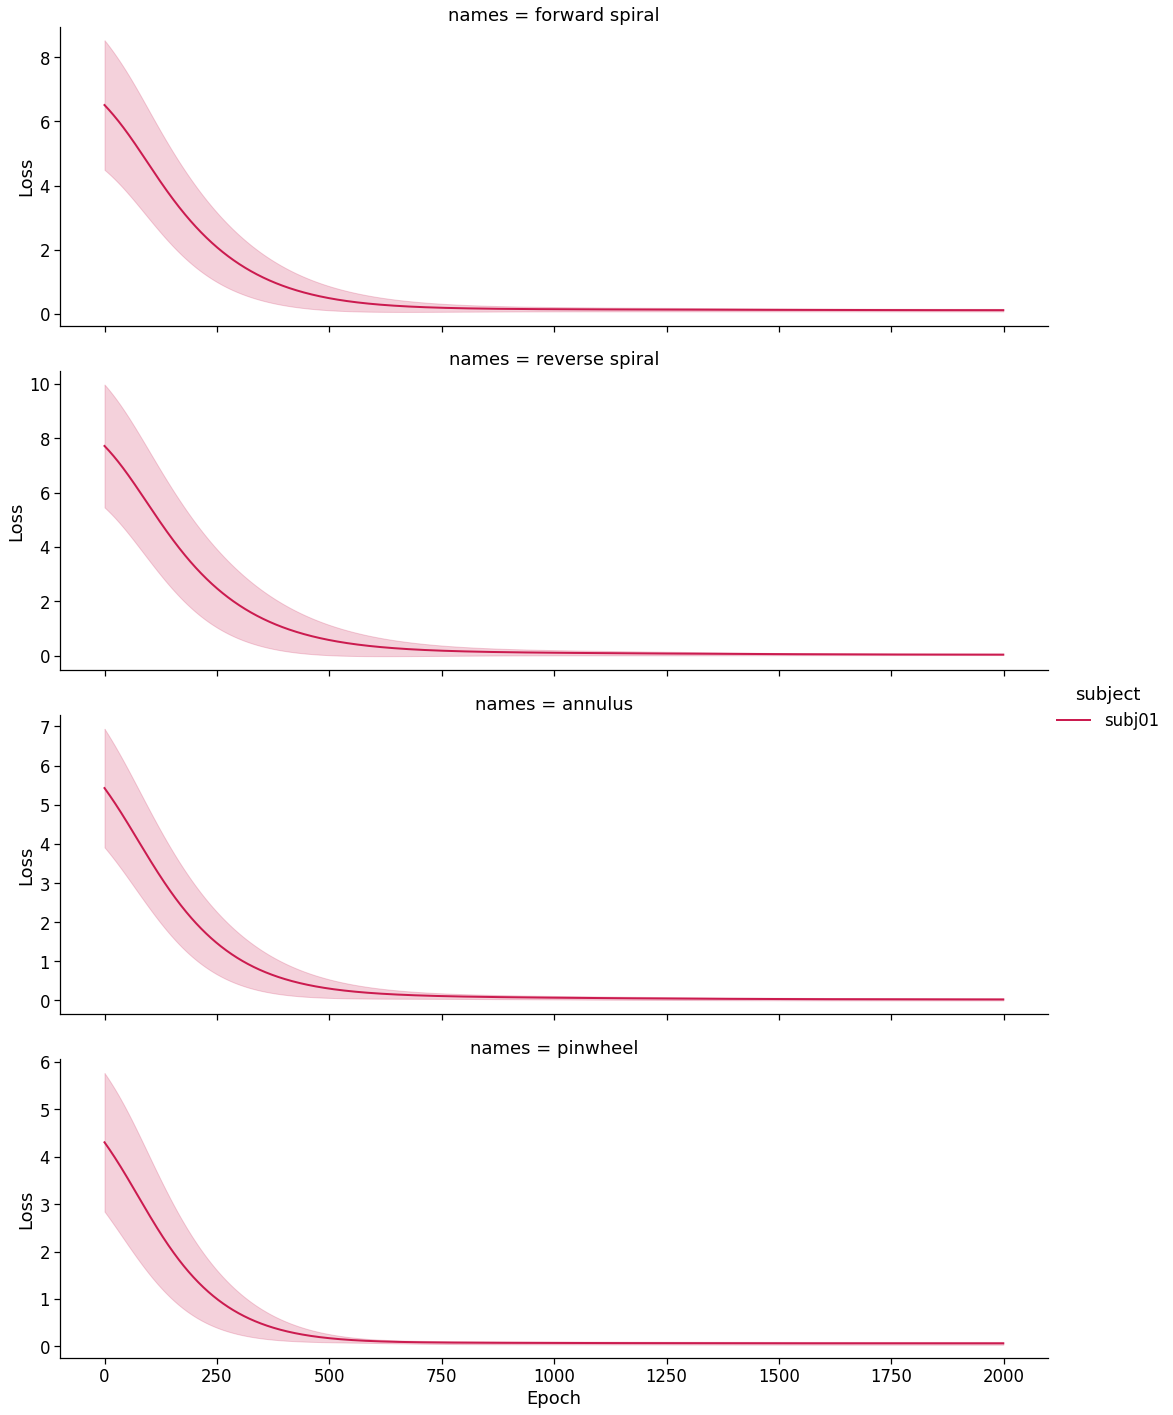

In [59]:
vis.plot_loss_history(df.query('epoch < 2000'), hue='sub',
                      hue_order=subj_list,
                      lgd_title='subject',
                      col='names',
                      log_y=False)

# Plot parameter history

In [60]:
f = []
for stim_type, subj in itertools.product(stim_type_list, subj_list):
    file_name = f'model-history_class-{stim_type}_lr-{lr}_eph-{max_epoch}_binned-ecc-{e1}-{e2}_nbin-{enum}_dset-nsdsyn_sub-{subj}_roi-{roi}_vs-pRFcenter.h5'
    f.append(os.path.join(results_dir, file_name))
args = ['class','lr','eph','dset','sub','roi']
model_df = tuning.load_history_files(f, *args)

In [61]:
model_df

,ecc_bin,epoch,slope,mode,sigma,names,lr_rate,max_epoch,dset,sub,vroinames
0,0.5-0.9375 deg,0,0.601447,0.696583,1.198955,forward spiral,0.005,10000,nsdsyn,subj01,V1
1,0.5-0.9375 deg,1,0.606447,0.701583,1.203955,forward spiral,0.005,10000,nsdsyn,subj01,V1
2,0.5-0.9375 deg,2,0.611448,0.706583,1.208956,forward spiral,0.005,10000,nsdsyn,subj01,V1
3,0.5-0.9375 deg,3,0.616452,0.711584,1.213958,forward spiral,0.005,10000,nsdsyn,subj01,V1
4,0.5-0.9375 deg,4,0.621460,0.716586,1.218962,forward spiral,0.005,10000,nsdsyn,subj01,V1
...,...,...,...,...,...,...,...,...,...,...,...
79995,3.5625-4.0 deg,9995,2.834924,1.049925,2.486574,pinwheel,0.005,10000,nsdsyn,subj01,V1
79996,3.5625-4.0 deg,9996,2.834924,1.049925,2.486574,pinwheel,0.005,10000,nsdsyn,subj01,V1
79997,3.5625-4.0 deg,9997,2.834924,1.049925,2.486574,pinwheel,0.005,10000,nsdsyn,subj01,V1
79998,3.5625-4.0 deg,9998,2.834924,1.049926,2.486574,pinwheel,0.005,10000,nsdsyn,subj01,V1


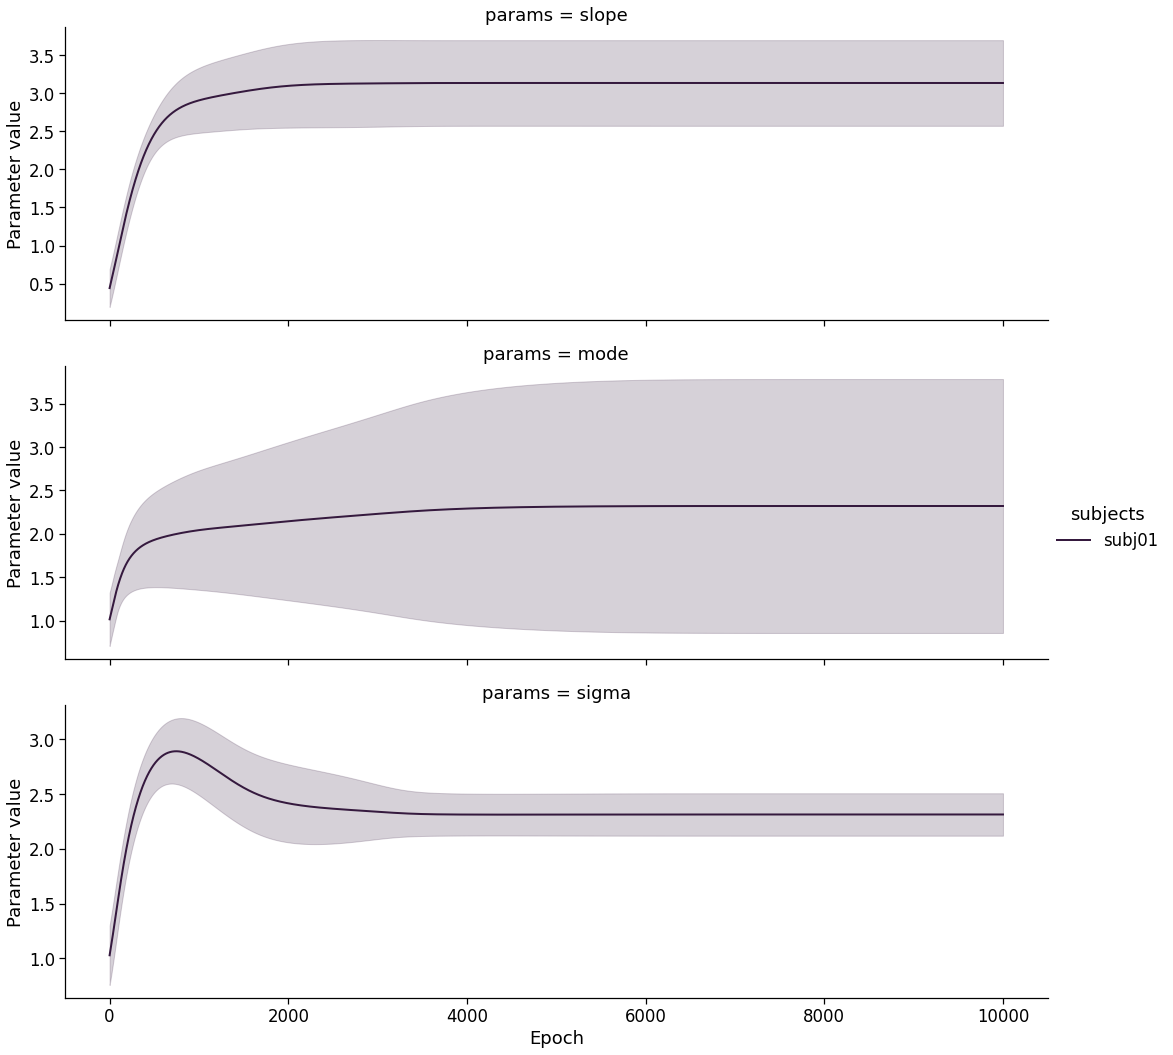

In [62]:
vis.plot_param_history(model_df, ['slope','mode','sigma'], [1,2,3],
                       hue='sub', hue_order=subj_list, lgd_title='subjects')

# Final paramters

# Preferred period

In [74]:
output_dir = '/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/binned'
file_name = os.path.join(output_dir, f'binned-ecc-{e1}-{e2}_nbin-{enum}_dset-nsdsyn_sub-{subj}_roi-{roi}_vs-{vs}.csv')
subj_df = pd.read_csv(file_name)

In [83]:
vis1D.plot_curves(subj_df, model_df.query('epoch == @max_epoch-1'))

AttributeError: module 'sfp_nsdsyn.visualization.plot_1D_model_results' has no attribute 'plot_curves'

# Broderick dataset comparison